# **Activity 7.01**
# **Building a Convolutional Neural Network with More ANN Layers**  

In thie activity for this Chapter, you’ll be putting all that you’ve learned to use as you build your own classifier with the CIFAR100. The CIFAR100 is 

Here's some code to get you started. Remember you can go back to previous exercises for guidance if needed. Good luck!


**1. Import Tensorflow**

In [0]:
!pip install tensorflow

In [0]:
import tensorflow as tf

**2. Check TensorFlow version**

In [0]:
print(tf.__version__)

2.2.0


**3. Import additional libraries.**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


**4. Load the CIFAR100 dataset.**

In [0]:
cifar100 = tf.keras.datasets.cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)


169009152/169001437 [==============================] - 6s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


**5. Check the number of classes.**

In [0]:
K = len(set(y_train))
print("number of classes:", K)


number of classes: 100


**6. Build the model.**

In [0]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)


**7. Compile the model.**

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)


Epoch 1/15
1563/1563 [==============================] - 52s 34ms/step - loss: 3.8349 - accuracy: 0.1129 - val_loss: 3.3179 - val_accuracy: 0.2084
Epoch 2/15
1563/1563 [==============================] - 51s 33ms/step - loss: 3.2574 - accuracy: 0.2111 - val_loss: 3.0022 - val_accuracy: 0.2640
Epoch 3/15
1563/1563 [==============================] - 49s 31ms/step - loss: 3.0106 - accuracy: 0.2551 - val_loss: 2.8780 - val_accuracy: 0.2888
Epoch 4/15
1563/1563 [==============================] - 49s 31ms/step - loss: 2.8343 - accuracy: 0.2909 - val_loss: 2.7144 - val_accuracy: 0.3261
Epoch 5/15
1563/1563 [==============================] - 48s 31ms/step - loss: 2.6983 - accuracy: 0.3187 - val_loss: 2.6562 - val_accuracy: 0.3412
Epoch 6/15
1563/1563 [==============================] - 48s 31ms/step - loss: 2.5785 - accuracy: 0.3398 - val_loss: 2.5693 - val_accuracy: 0.3518
Epoch 7/15
1563/1563 [==============================] - 48s 31ms/step - loss: 2.4689 - accuracy: 0.3616 - val_loss: 2.5666 -

**8. Plot loss.**

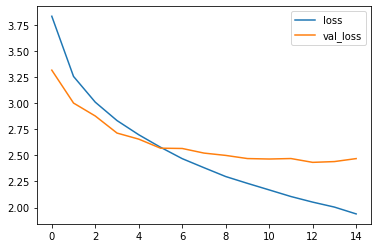

In [0]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();


**9. Plot accuracy**

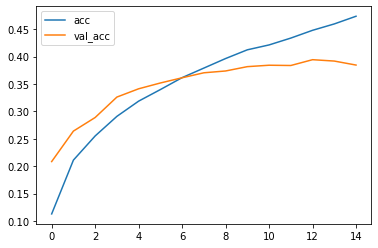

In [0]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();


**11. Label mapping.**

In [0]:
labels = '''beaver, dolphin, otter, seal, whale
	aquarium fish, flatfish, ray, shark, trout
	orchids, poppies, roses, sunflowers, tulips
	bottles, bowls, cans, cups, plates
	apples, mushrooms, oranges, pears, sweet peppers
	clock, computer keyboard, lamp, telephone, television
	bed, chair, couch, table, wardrobe
	bee, beetle, butterfly, caterpillar, cockroach
	bear, leopard, lion, tiger, wolf
	bridge, castle, house, road, skyscraper
	cloud, forest, mountain, plain, sea
	camel, cattle, chimpanzee, elephant, kangaroo
	fox, porcupine, possum, raccoon, skunk
	crab, lobster, snail, spider, worm
	baby, boy, girl, man, woman
	crocodile, dinosaur, lizard, snake, turtle
	hamster, mouse, rabbit, shrew, squirrel
	maple, oak, palm, pine, willow
	bicycle, bus, motorcycle, pickup truck, train
	lawn-mower, rocket, streetcar, tank, tractor'''.split()


**12. Check random incorrectly classified image.**

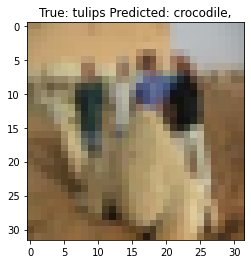

In [0]:
wrong = np.where(pred_test != y_test)[0]
i = np.random.choice(wrong)
plt.imshow(x_test[i], cmap='gray')
plt.title("True: %s Predicted: %s" % (labels[y_test[i]], labels[pred_test[i]]));
